## 1. Introduction

To brush up your python knowledge this link is recommended http://cs231n.github.io/python-numpy-tutorial/#python-basic

Direct IPython note book Link https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

### The customary Hello World !

In [87]:
print("Hello World!")

Hello World!


### Comments

In [88]:
'''
Block Comments 1
Block Comments 2
'''

# line comments

print()

### The Format method

In [89]:
#dynamically typed two data types
age = 20
name = 'Sheldon'


print('{} was {} years old when he wrote this book'.format(name, age))
print('Why is {} playing with that python?'.format(name))

Sheldon was 20 years old when he wrote this book
Why is Sheldon playing with that python?


In [90]:
print('{0:.3f}'.format(1.0/3))

0.333


In [91]:
print('{0:_^11}'.format('hello'))

___hello___


### Conditions and Loops

In [92]:
name = "Sheldon"
age = 23
if name == "Sheldon" and age == 23:
    print("Your name is Sheldon, and you are also 23 years old.")

if name == "Sheldon" or name == "Raj":
    print("Your name is either Sheldon or Raj.")

Your name is Sheldon, and you are also 23 years old.
Your name is either Sheldon or Raj.


### while and for loop

## 2. Numpy

http://cs231n.github.io/python-numpy-tutorial/#python-basic  
Direct IPython note book Link https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb

## 3. Pandas

[https://www.learnpython.org/en/Pandas_Basics](https://www.learnpython.org/en/Pandas_Basics)

## 4. Image

As we saw in the lecture, the images can be loaded in a form of Tensor
There are many ways how we can load images and convert them into tensors.
 We will be using pytorch's Tensors to manipulate images as tensors, and the pillow (PIL) image processing library. [Read more abouit PIL](https://pillow.readthedocs.io/en/5.3.x/)

Reference : https://www.cs.virginia.edu/~vicente/recognition/notebooks/image_processing_lab.html

In [267]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline

In [268]:
input_image = Image.open('Lenna.png')

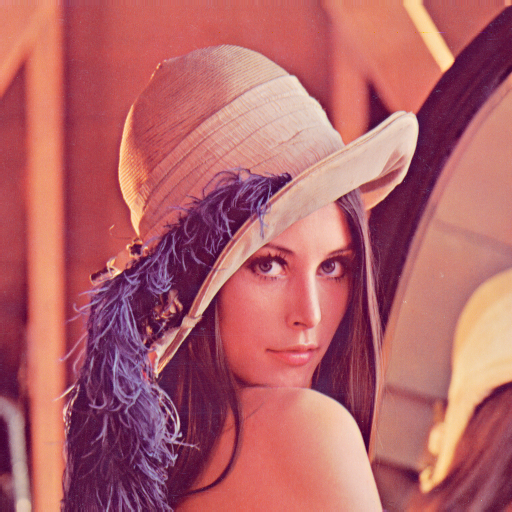

In [269]:
input_image

In [270]:
pil_to_tensor = transforms.ToTensor()

In [271]:
input_tensor = pil_to_tensor(input_image)

In [272]:
input_tensor.shape
# The shape of the tensor returned is Channels x Height X Width

torch.Size([3, 512, 512])

In [273]:
# Plot the image here using matplotlib.
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

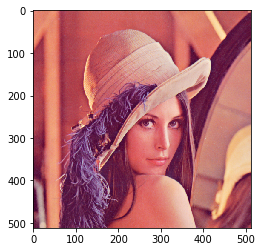

In [274]:
plot_image(input_tensor)

### 4.1 Image Channels

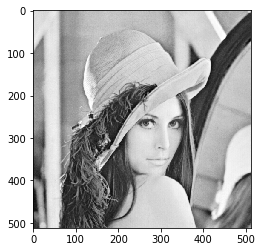

In [275]:
# Plot the image here using matplotlib.
def plot_image_channel(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy(), cmap='gray')
    plt.show()
    
plot_image_channel(input_tensor[0])

In [276]:
#Always keep this in mind!
image_copy = input_tensor.clone()


In [277]:
# Multiply the green channel by two, clamp the values to the 0-1 range.
image_copy[1] = image_copy[1].mul(2.0).clamp(0.0, 1.0)

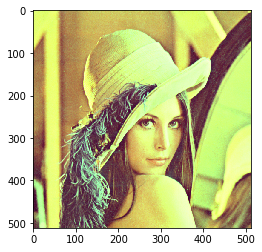

In [278]:
plot_image(image_copy)

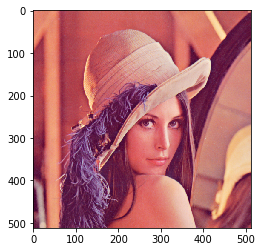

In [279]:
plot_image(input_tensor)

### 4.2 Convert to Gray scale

In [280]:
pil_to_grayscale = transforms.Grayscale()

In [281]:
gray_image = pil_to_grayscale(input_image)

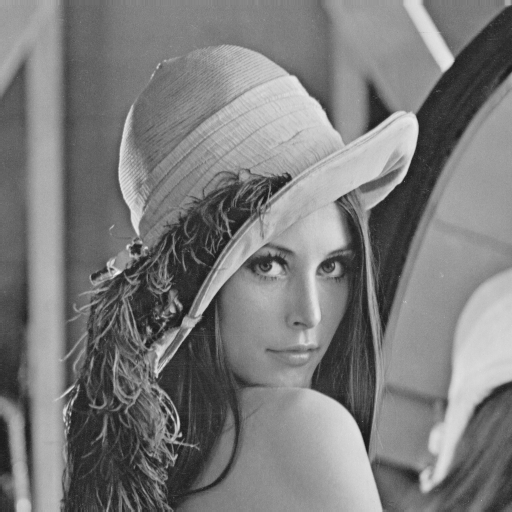

In [282]:
gray_image

In [283]:
gray_tensor = pil_to_tensor(gray_image)

In [284]:
gray_tensor.shape

torch.Size([1, 512, 512])

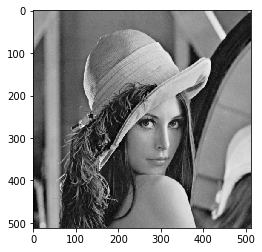

In [285]:
plot_image_channel(gray_tensor[0])

### 4.3 Augmemntation

In [286]:
augment = transforms.Compose([ transforms.CenterCrop(400),
                              transforms.RandomAffine(degrees=10),
                             transforms.ToTensor()
                             ])

In [287]:
type(input_image)

PIL.PngImagePlugin.PngImageFile

In [288]:
augment_image = augment(input_image)

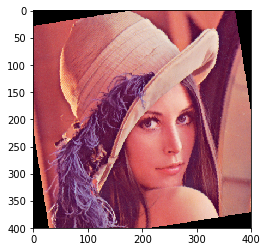

In [289]:
plot_image(augment_image)

### 4.4 Convolution

In [290]:
#small hack
def SingleChannelConvolution(input_image, kernel):
    import torch.nn.functional as F
    from torch.autograd import Variable
    output = F.conv2d(Variable(input_image.unsqueeze(0).unsqueeze(0)), 
                      Variable(kernel.unsqueeze(0).unsqueeze(0)), padding = 1)
    return output.data.squeeze()

In [291]:
input_tensor = input_tensor[0]

In [292]:
# The kernel is a 3x3 matrix that computes the Sobel operator.
# See https://en.wikipedia.org/wiki/Sobel_operator
weights = torch.Tensor([[1.0, 0.0, -1.0],
                        [2.0, 0.0, -2.0],
                        [1.0, 0.0, -1.0]])

In [293]:
output1 = SingleChannelConvolution(input_tensor, weights)
output2 = SingleChannelConvolution(input_tensor, weights.t())

In [294]:
padder = torch.ones(input_tensor.size(0), 10)
output = torch.cat((output1,padder,output2),1 )

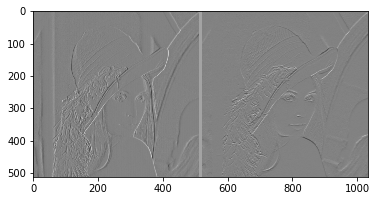

In [295]:
plot_image_channel(output)